In [1]:
#mounting drive to allow access to data folders contained within drive
#from google.colab import drive
#drive.mount('/content/drive')

## About this dataset:
Data Source - https://www.kaggle.com/rtatman/chocolate-bar-ratings

## Contents:

**Pre-Processing**
1. Handling missing values
2. Modifying dtypes
3. Removing '%'

**Data Description**
1. Data Range
2. Boxplots

**Rating**
1. Which countries produced the most chocolate brands in this study? -done
2. Which companies produce best rated chocolate? -done
3. What's the average rating of chocolate in different countries? -done
4. Rating movement over years -done


**Cocoa Percentage**
5. Correlation between cocoa percentage and rating -done
6. What cocoa percentage countries produce the most (mode)? -to do
7. Cocoa percentage over years -done

**Bean_Type**
8. Which Bean has been used most widely?
9. What is the percentage of trinitario, criollo, forastero in the data?
10. Which bean type ampng these three are best rated?
11. Where is the Chocolate Bar production company located which use these bean types and maanged to be better than the average?
12. Which company has the best rated trinitario, criollo, forastero and a blend of these bean types?

**Ireland**
13. Which chocolate brand has the best rating in Ireland?
14. Rating over years in Ireland
15. Bean origins in Ireland
16. Producers in Ireland

**Most importantly...**

**Which one is THE best?**

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

In [3]:
#Importation
dataset = pd.read_csv("flavors_of_cacao.csv")

In [4]:
def pre_processing(dataset):
 
    #Renaming the columns
    dataset.columns = ['Company', 'Specific_Bean_Origin', 'REF', 'Review_Date', 'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean_Type', 'Broad_Bean_Orgin']
    # print(dataset.shape)

    #Checking dataset information
    # dataset.info()

    #handling missing values
    dataset= dataset.replace('?', np.NaN)
    missing = dataset.isnull().sum()
    # print(missing)
    dataset.fillna('UNKNOWN',inplace=True)
    print(dataset.isnull().sum())

    #Checking dataset after handling missing values
    print(dataset.shape)

    #Making dataset values understandable by python
    dataset['Company']=dataset['Company'].astype('category')
    dataset['Cocoa_Percentage']=(dataset['Cocoa_Percentage']).str.replace('%', ' ')
    dataset['Cocoa_Percentage']=(dataset['Cocoa_Percentage']).astype(float)

    # dataset.head()
    return dataset

In [5]:
dataset = pre_processing(dataset)

Company                 0
Specific_Bean_Origin    0
REF                     0
Review_Date             0
Cocoa_Percentage        0
Company_Location        0
Rating                  0
Bean_Type               0
Broad_Bean_Orgin        0
dtype: int64
(1795, 9)


In [6]:
dataset

Company Specific_Bean_Origin   REF  Review_Date  Cocoa_Percentage  \
0     A. Morin          Agua Grande  1876         2016              63.0   
1     A. Morin                Kpime  1676         2015              70.0   
2     A. Morin               Atsane  1676         2015              70.0   
3     A. Morin                Akata  1680         2015              70.0   
4     A. Morin               Quilla  1704         2015              70.0   
...        ...                  ...   ...          ...               ...   
1790    Zotter                 Peru   647         2011              70.0   
1791    Zotter                Congo   749         2011              65.0   
1792    Zotter         Kerala State   749         2011              65.0   
1793    Zotter         Kerala State   781         2011              62.0   
1794    Zotter   Brazil, Mitzi Blue   486         2010              65.0   

     Company_Location  Rating  Bean_Type Broad_Bean_Orgin  
0              France    3.75                    Sao Tome  
1              France    2.75                        Togo  
2              France    3.00                        Togo  
3              France    3.50                        Togo  
4              France    3.50                        Peru  
...               ...     ...        ...              ...  
1790          Austria    3.75                        Peru  
1791          Austria    3.00  Forastero            Congo  
1792          Austria    3.50  Forastero            India  
1793          Austria    3.25                       India  
1794          Austria    3.00                      Brazil  

[1795 rows x 9 columns]

## Descriptives

In [7]:
dataset.dtypes

Company                 category
Specific_Bean_Origin      object
REF                        int64
Review_Date                int64
Cocoa_Percentage         float64
Company_Location          object
Rating                   float64
Bean_Type                 object
Broad_Bean_Orgin          object
dtype: object

In [8]:
dataset.describe(include = 'all')

Company Specific_Bean_Origin          REF  Review_Date  \
count     1795                 1795  1795.000000  1795.000000   
unique     416                 1039          NaN          NaN   
top       Soma           Madagascar          NaN          NaN   
freq        47                   57          NaN          NaN   
mean       NaN                  NaN  1035.904735  2012.325348   
std        NaN                  NaN   552.886365     2.927210   
min        NaN                  NaN     5.000000  2006.000000   
25%        NaN                  NaN   576.000000  2010.000000   
50%        NaN                  NaN  1069.000000  2013.000000   
75%        NaN                  NaN  1502.000000  2015.000000   
max        NaN                  NaN  1952.000000  2017.000000   

        Cocoa_Percentage Company_Location       Rating Bean_Type  \
count        1795.000000             1795  1795.000000      1795   
unique               NaN               60          NaN        42   
top                  NaN           U.S.A.          NaN             
freq                 NaN              764          NaN       887   
mean           71.698329              NaN     3.185933       NaN   
std             6.323118              NaN     0.478062       NaN   
min            42.000000              NaN     1.000000       NaN   
25%            70.000000              NaN     2.875000       NaN   
50%            70.000000              NaN     3.250000       NaN   
75%            75.000000              NaN     3.500000       NaN   
max           100.000000              NaN     5.000000       NaN   

       Broad_Bean_Orgin  
count              1795  
unique              101  
top           Venezuela  
freq                214  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [9]:
print("Dataset contains no. of different companies: ",dataset['Company'].nunique())
print("Dataset contains no. of different company locations: ",dataset['Company_Location'].nunique())
print("Dataset contains no. of different bean origin locales - specific: ",dataset['Specific_Bean_Origin'].nunique())
print("Dataset contains no. of different years: ",dataset['Review_Date'].nunique())
print("Dataset contains years range from ",dataset['Review_Date'].min(), "to ", dataset['Review_Date'].max())
print("Dataset contains the range of cocoa pct between ",dataset['Cocoa_Percentage'].min(), " and ",  dataset['Cocoa_Percentage'].max()) #cleaning needed
print("Dataset contains the range of Rating between ",dataset['Rating'].min(), " and ",  dataset['Rating'].max())

Dataset contains no. of different companies:  416
Dataset contains no. of different company locations:  60
Dataset contains no. of different bean origin locales - specific:  1039
Dataset contains no. of different years:  12
Dataset contains years range from  2006 to  2017
Dataset contains the range of cocoa pct between  42.0  and  100.0
Dataset contains the range of Rating between  1.0  and  5.0


In [10]:
dataset['Broad_Bean_Orgin'].unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', '\xa0', 'Jamaica',
       'Grenada', 'Guatemala', 'Honduras', 'Costa Rica',
       'Domincan Republic', 'Haiti', 'Congo', 'Philippines', 'Malaysia',
       'Dominican Rep., Bali', 'Venez,Africa,Brasil,Peru,Mex', 'Gabon',
       'Ivory Coast', 'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda',
       'Martinique', 'Sao Tome & Principe', 'Vanuatu', 'Australia',
       'Liberia', 'Ecuador, Costa Rica', 'West Africa', 'Hawaii',
       'St. Lucia', 'Cost Rica, Ven', 'Peru, Madagascar',
       'Venezuela, Trinidad', 'Trinidad, Tobago',
       'Ven, Trinidad, Ecuador', 'South America, Africa', 'India',
       'Africa, Carribean, C. Am.', 'Tobago', 'Ven., Indonesia, Ecuad.',
       'Trinidad-Tobago

In [11]:
dataset['Cocoa_Percentage'] = dataset['Cocoa_Percentage'] / 100.0
dataset['Cocoa_Percentage'].sort_values(ascending=True).unique()
print("Dataset contains the range of cocoa pct between ",dataset['Cocoa_Percentage'].min(), " and ",  dataset['Cocoa_Percentage'].max()) #[51] cleaning done

Dataset contains the range of cocoa pct between  0.42  and  1.0


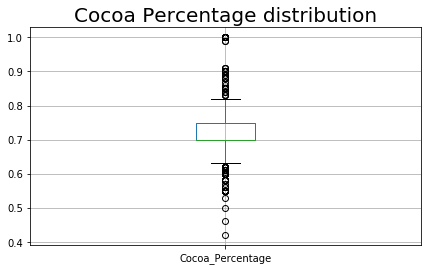

In [12]:
num_cols = ['Cocoa_Percentage']
plt.figure(figsize=(7,4))
dataset[num_cols].boxplot()
plt.title("Cocoa Percentage distribution", fontsize=20)
plt.show()

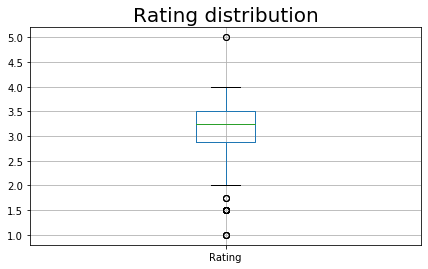

In [13]:
num_cols = ['Rating']
plt.figure(figsize=(7,4))
dataset[num_cols].boxplot()
plt.title("Rating distribution", fontsize=20)
plt.show()

# Rating

## 1. Which countries produced the most chocolate brands in this study?

Top Chocolate Producing Countries in the World
U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: Company_Location, dtype: int64


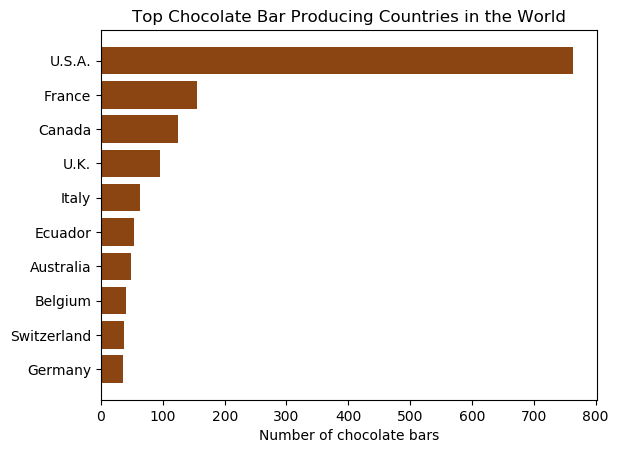

<Figure size 640x480 with 0 Axes>

In [14]:
print ('Top Chocolate Producing Countries in the World')
country=list(dataset['Company_Location'].value_counts().head(10).index)
choco_bars=list(dataset['Company_Location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(dataset['Company_Location'].value_counts().head())

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(country, choco_bars, align='center', color='saddlebrown')
ax.set_yticks(country)
ax.set_yticklabels(country)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of chocolate bars')
title = "Top Chocolate Bar Producing Countries in the World"
ax.set_title(title)
plt.show()
plt.savefig(title + '.png')

## 2. What's the average rating of chocolate in different countries?

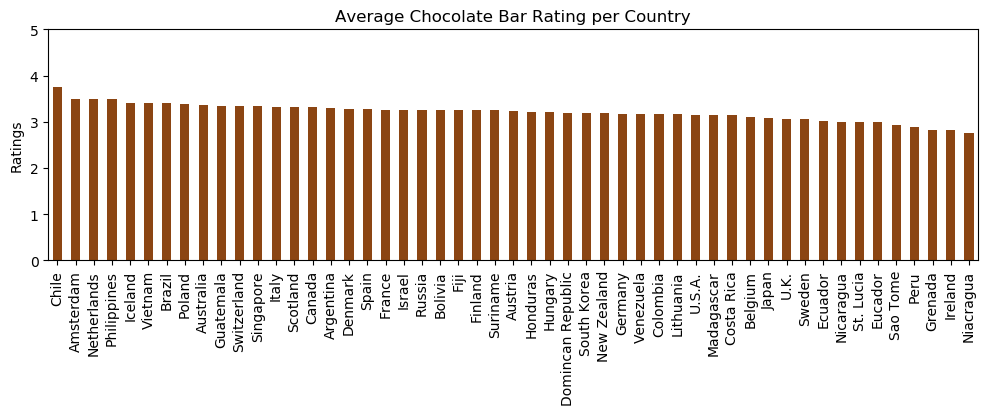

In [15]:
rating_mean = dataset.groupby(['Company_Location'])['Rating'].mean().sort_values(ascending=False)
mean_desc=rating_mean.sort_values(ascending=False)
top_50_countries=mean_desc[:51]
top_50_countries.head(51)
plt.figure(figsize=(12,3))
title="Average Chocolate Bar Rating per Country"
plt.title(title)
top_50_countries.plot.bar(color="saddlebrown")
plt.xlabel('')
plt.ylabel('Ratings')
plt.ylim(0,5)
plt.savefig(title)

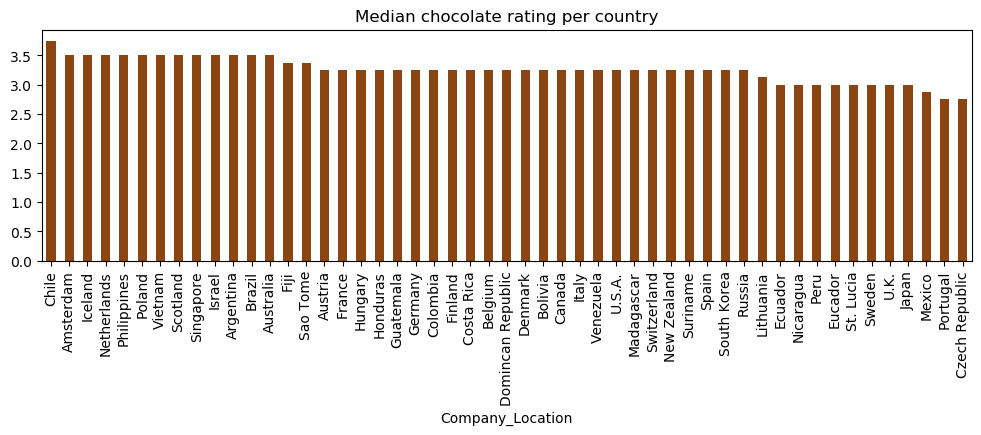

In [16]:
rating_med = dataset.groupby(['Company_Location'])['Rating'].median().sort_values(ascending=False)
med_desc=rating_med.sort_values(ascending=False)
top_50_countries_med=med_desc[:51]
top_50_countries_med.head(51)
plt.figure(figsize=(12,3))
plt.title("Median chocolate rating per country")
top_50_countries_med.plot.bar(color="saddlebrown")

## 3. Which companies produce best rated chocolate?

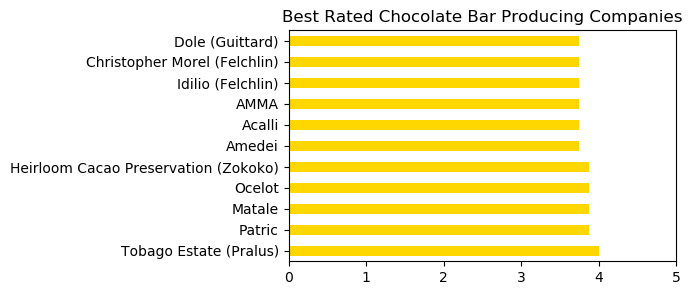

In [17]:
rating_median = dataset.groupby(['Company'])['Rating'].median().sort_values(ascending=False)
median_desc=rating_median.sort_values(ascending=False)
top_10_comp=median_desc[:11]
top_10_comp.head(11)
plt.figure(figsize=(5,3))
title="Best Rated Chocolate Bar Producing Companies"
plt.title(title)
top_10_comp.plot.barh(color="gold")
plt.ylabel('')
plt.xlim(0,5)
plt.savefig(title)

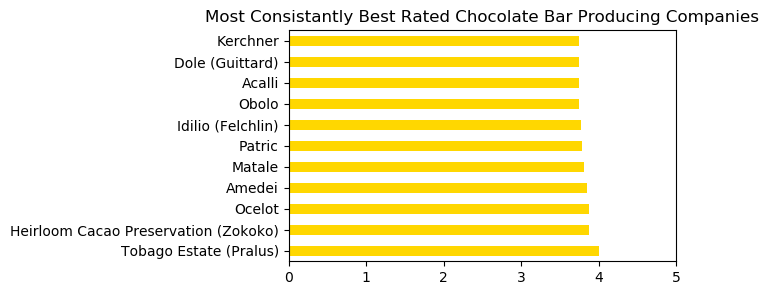

In [18]:
rating_mean = dataset.groupby(['Company'])['Rating'].mean().sort_values(ascending=False)
mean_desc=rating_mean.sort_values(ascending=False)
top_10_comp=mean_desc[:11]
top_10_comp.head(11)
plt.figure(figsize=(5,3))
title = "Most Consistantly Best Rated Chocolate Bar Producing Companies"
plt.title(title)
top_10_comp.plot.barh(color="gold")
plt.ylabel('')
plt.xlim(0,5)
plt.savefig(title)

## 4. Rating movement over years

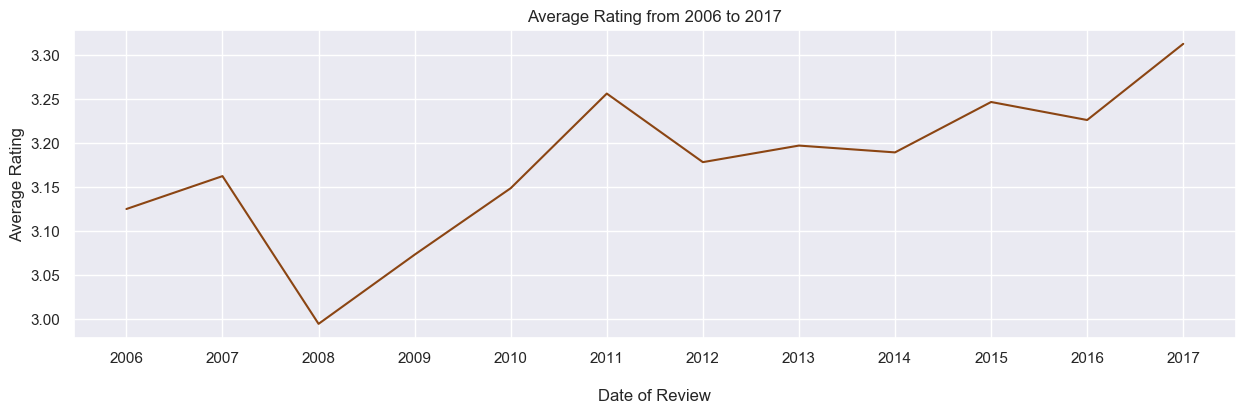

<Figure size 640x480 with 0 Axes>

In [19]:
over_years = dataset.groupby('Review_Date').aggregate({'Rating':'mean'})
over_years = over_years.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Rating', data=over_years, color='saddlebrown')
ax.set(xticks=over_years.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
title = "Average Rating from 2006 to 2017"
plt.title(title)
plt.show()
plt.savefig(title)

# Cocoa Percentage

## 5. Correlation between cocoa percentage and rating

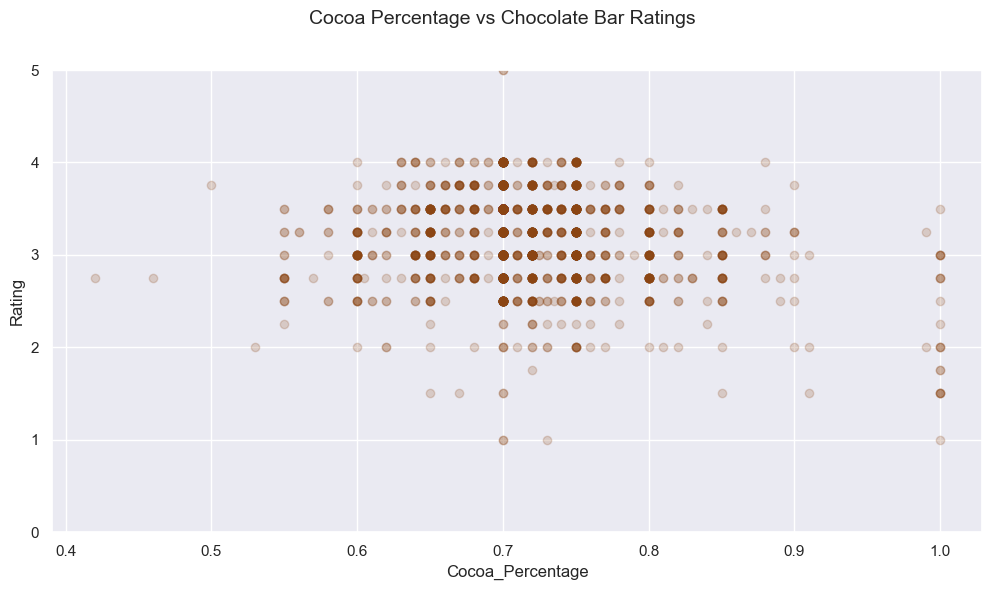

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))
plt.xlabel("Cocoa_Percentage", fontsize=12)
plt.ylabel("Rating", fontsize=12)
title="Cocoa Percentage vs Chocolate Bar Ratings"
plt.suptitle(title, fontsize= 14)
plt.plot(dataset.Cocoa_Percentage, dataset['Rating'], 'bo', alpha=0.2, color='saddlebrown')
plt.ylim(0, 5)
plt.show()
plt.savefig(title)

Negative correlation between cocoa percentage and rating.

In [21]:
dataset.corr()[['Cocoa_Percentage', 'Rating']]

Cocoa_Percentage    Rating
REF                       0.037791  0.101030
Review_Date               0.038177  0.099846
Cocoa_Percentage          1.000000 -0.164820
Rating                   -0.164820  1.000000

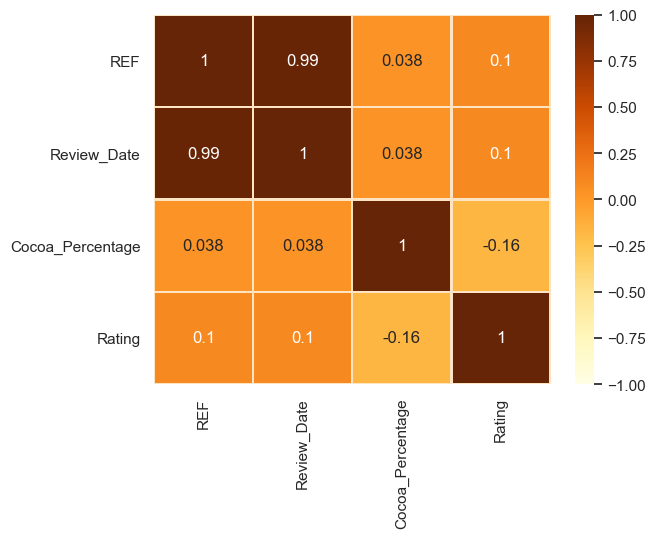

In [22]:
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, linewidth=1 , linecolor='bisque', cmap="YlOrBr")
title = "Heatmap"
plt.savefig(title)

## 6. What cocoa percentage countries produce the most? 

In [23]:
coc_loc_top_10 = dataset.groupby(['Company_Location']).median().reset_index()[['Company_Location','Cocoa_Percentage']].sort_values(by='Cocoa_Percentage', ascending=False)[:10]

In [24]:
coc_loc_top_10

Company_Location  Cocoa_Percentage
59            Wales             0.800
20            Ghana             0.800
45         Sao Tome             0.775
42         Portugal             0.760
16             Fiji             0.760
15          Eucador             0.750
37        Niacragua             0.750
27          Ireland             0.750
23         Honduras             0.750
58          Vietnam             0.740

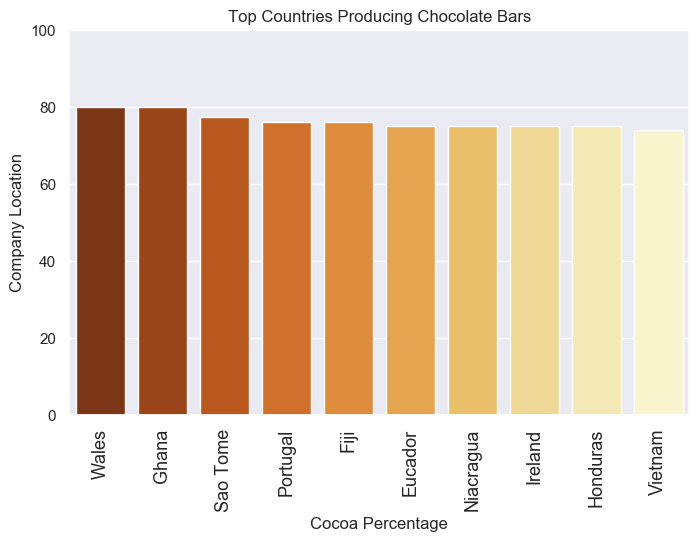

In [25]:
plt.figure(figsize=[8,5])
sns.barplot(x=coc_loc_top_10['Company_Location'], y=coc_loc_top_10['Cocoa_Percentage']*100, data=coc_loc_top_10, palette='YlOrBr_r')
plt.xticks(rotation=90)
plt.xlabel('Cocoa Percentage', fontsize=12)
plt.ylabel('Company Location', fontsize=12)
plt.xticks(fontsize=13)
plt.ylim(0,100, 20)
title="Top Countries Producing Chocolate Bars"
plt.title(title)
plt.savefig(title)

## 7. Average cocoa percentage over years



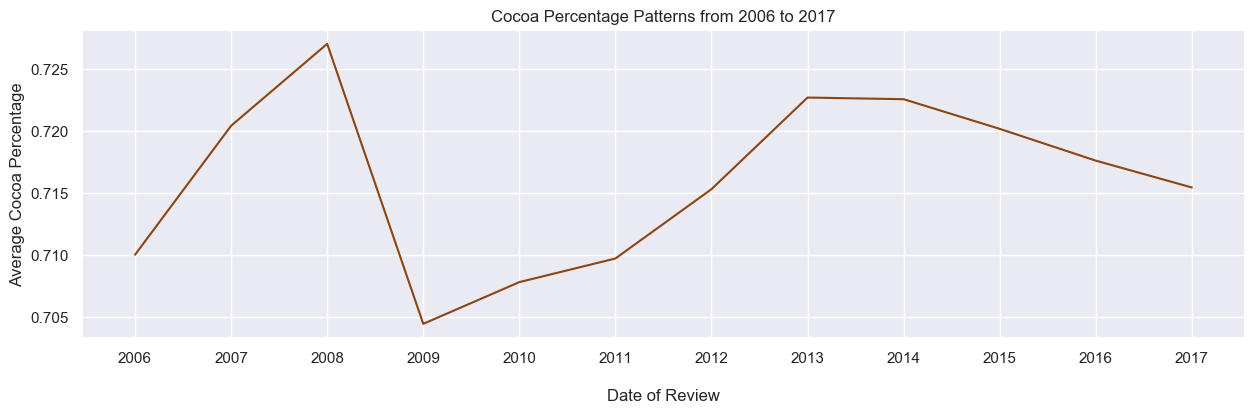

<Figure size 640x480 with 0 Axes>

In [26]:
years_cp = dataset.groupby('Review_Date').aggregate({'Cocoa_Percentage':'mean'})
years_cp = years_cp.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Cocoa_Percentage', data=years_cp, color="saddlebrown")
ax.set(xticks=years_cp.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
title = "Cocoa Percentage Patterns from 2006 to 2017"
plt.title(title)
plt.show()
plt.savefig(title)

Year 2008 had the highest average cocoa percentage and at the same time the lowest average rating recorded (fig. Rating 4.)

## Bean Type

### 8. Which Bean has been used most widely?

In [27]:
dataset['Bean_Type'].value_counts()

                            887
Trinitario                  419
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Nacional (Arriba)             3
EET                           3
Matina                        3
Beniano                       3
Forastero (Catongo)           2
Criollo, Forastero            2
Trinitario, Forastero         2
Amazon, ICS                   2
Trinitario (85% Criollo)      2
Nacional                      2
Criollo (Ocumare 61)          2
Amazon mix                    2
Criollo (Amarru)              2
Criollo (Ocumare 67)          1
UNKNOWN                       1
Trinitario, Nacional          1
Blend-Forastero,Criollo       1
Criollo (Ocumare)             1
CCN51                         1
Criollo 

In [28]:
## Clean Bean Type

import string

def clean_bean_type(bean_type_text):
    # print(bean_type_text)
    if bean_type_text.strip() is '':
        return 'UNKNOWN'
    list_bean_type = ['trinitario', 'criollo', 'forastero']
    # remove punctuation
    cleaned_text = ''.join([char for char in bean_type_text.lower() if char not in string.punctuation])
    count = 0
    bean_type = None
    for each_word in cleaned_text.split(' '):
        if each_word in list_bean_type:
            bean_type=each_word
            count += 1
    # print(count)
    if count == 1:
        return bean_type.upper()
    elif count > 1 or 'BLEND' in cleaned_text.upper():
        return 'BLEND'
    else:
        return 'OTHER/UNKNOWN'
    
dataset['Bean_Type_Cleaned'] = dataset['Bean_Type'].apply(lambda x: clean_bean_type(x))

In [29]:
# Test Conversion

bean_type_count_df = pd.DataFrame(dataset['Bean_Type_Cleaned'].value_counts())
bean_type_count_df['Bean_Type_Cleaned'].sum() == len(dataset)

True

In [30]:
bean_type_count_df

Bean_Type_Cleaned
UNKNOWN                      887
TRINITARIO                   423
FORASTERO                    194
CRIOLLO                      172
BLEND                         97
OTHER/UNKNOWN                 22

### 9. What is the percentage of trinitario, criollo, forastero in the data?


In [31]:
bean_type_count_df['Bean_Type_Percentage'] = bean_type_count_df['Bean_Type_Cleaned'] * 100 / len(dataset)
bean_type_count_df

Bean_Type_Cleaned  Bean_Type_Percentage
UNKNOWN                      887             49.415042
TRINITARIO                   423             23.565460
FORASTERO                    194             10.807799
CRIOLLO                      172              9.582173
BLEND                         97              5.403900
OTHER/UNKNOWN                 22              1.225627

## Observation:

#### Percentages of bean_type distribution

23.5% of the dataset is trinitario, 10.8% is forastero and 9.5% is criollo.

## 10. Which bean type among these three are best rated?

Text(0.5, 0, 'Chocolate Bar Rating')

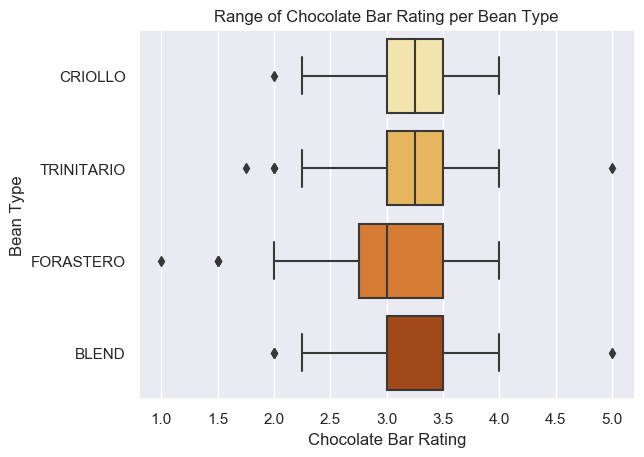

In [32]:
list_bean_type = ['TRINITARIO', 'CRIOLLO', 'FORASTERO', 'BLEND']

sns.boxplot(x='Rating',y='Bean_Type_Cleaned', data=dataset[dataset['Bean_Type_Cleaned'].isin(list_bean_type)], palette='YlOrBr')
plt.title('Range of Chocolate Bar Rating per Bean Type')
plt.ylabel('Bean Type')
plt.xlabel('Chocolate Bar Rating')

In [33]:
# Why is there no median line for blend?
dataset['Rating'][dataset['Bean_Type_Cleaned']=='BLEND'].median()

3.5

The median coincides with Q3.

Observations:

1. 'Trinitario' bagged full marks on rating and 'BLEND' as well. Distributions of Criollo and Trinitaro look similar.
2. Forastero has the longest spread of ratings. It also has the most share of data. So, makes sense. But doesn't have the highest avg. rating though.
3. The highest median rating belongs to the blend category besides, it also has one of the best rated cocoa.

## 11. Where is the Chocolate Bar production company located which use these bean types and maanged to be better than the average?

In [34]:
dataset[(dataset['Bean_Type_Cleaned']=='TRINITARIO') & (dataset['Rating']>=3)].groupby('Company_Location').mean().reset_index()[['Company_Location','Rating']][:10]

Company_Location    Rating
0        Amsterdam  3.375000
1        Argentina  3.500000
2        Australia  3.450000
3          Austria  3.500000
4          Belgium  3.638889
5           Brazil  3.500000
6           Canada  3.500000
7         Colombia  3.250000
8          Ecuador  3.000000
9             Fiji  3.416667

In [35]:
list_bean_type

['TRINITARIO', 'CRIOLLO', 'FORASTERO', 'BLEND']

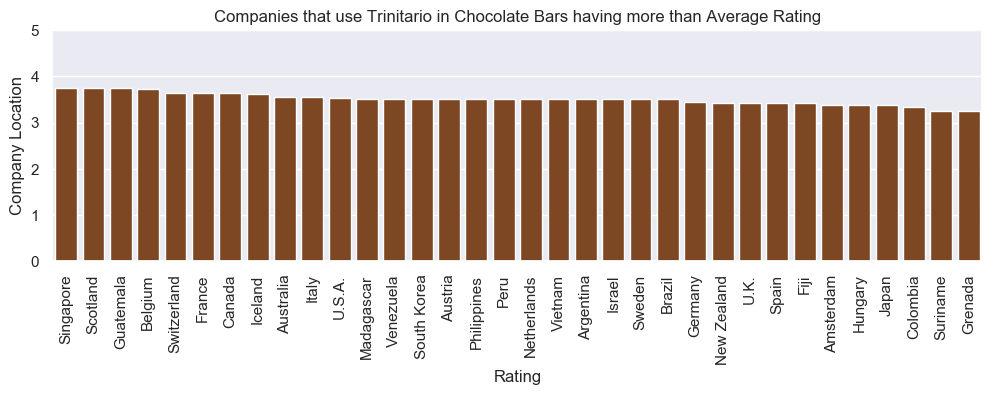

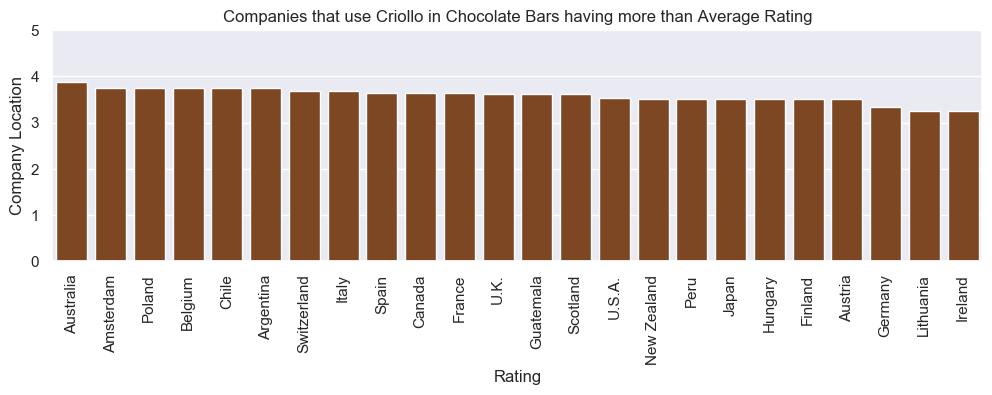

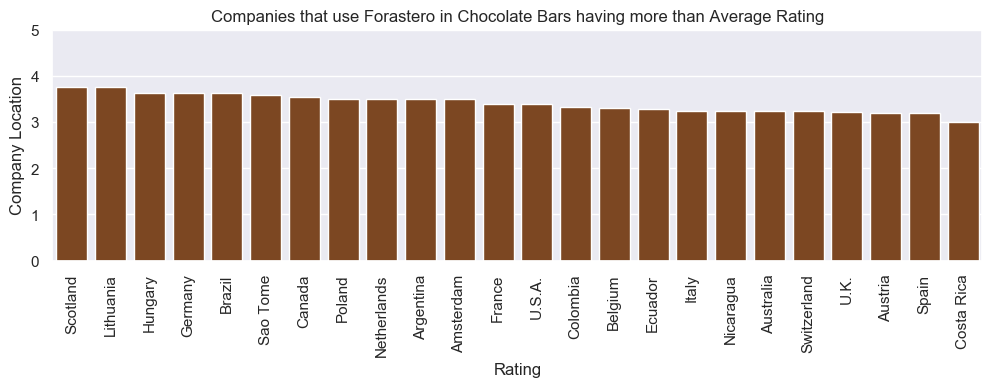

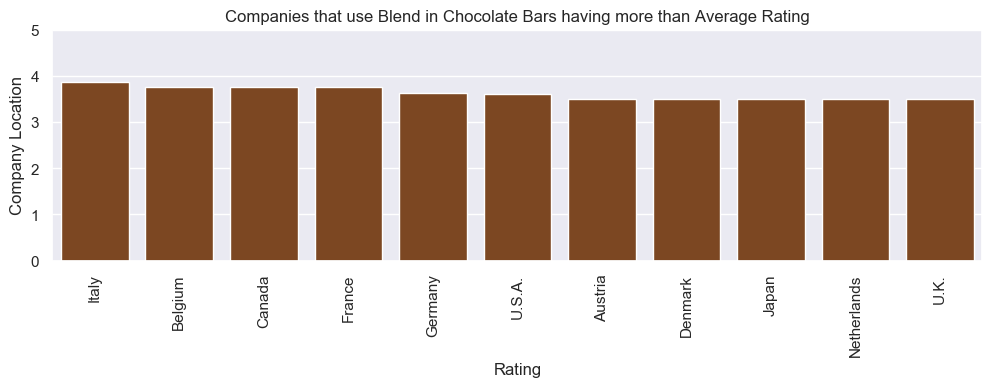

In [36]:
for each_bean_type in list_bean_type:
    # print(each_bean_type)
    rating_median=dataset['Rating'][dataset['Bean_Type_Cleaned']==each_bean_type].median()
    temp_data=dataset[(dataset['Bean_Type_Cleaned']==each_bean_type) & (dataset['Rating']>=rating_median)].groupby('Company_Location').mean().sort_values(by='Rating' ,ascending=False).reset_index()[['Company_Location','Rating']]
    countries_list = temp_data['Company_Location']
    ratings_list = temp_data['Rating']
    plt.figure(figsize=(12,3))
    sns.barplot(x=countries_list, y=ratings_list ,color="saddlebrown")
    plt.ylim(0,5)
    plt.title('Companies that use ' + each_bean_type.title() + ' in Chocolate Bars having more than Average Rating')
    plt.xticks(rotation=90)
    plt.xlabel('Rating')
    plt.ylabel('Company Location')
    plt.show()

### 12.  Which company has the best rated trinitario, criollo, forastero and a blend of these bean types?

In [37]:
best_rating_bean_type = dataset.groupby(by=['Bean_Type_Cleaned'])['Rating'].max().reset_index()
best_rating_bean_type = best_rating_bean_type[best_rating_bean_type['Bean_Type_Cleaned'].isin(list_bean_type)]

In [38]:
def get_best_bean_company(x):
#     print(x['Bean_Type_Cleaned'])
    temp_data = dataset[(dataset['Bean_Type_Cleaned']==x['Bean_Type_Cleaned']) & (dataset['Rating']==x['Rating'])]
    unique_company_names = list(temp_data['Company'].unique())
#     print(unique_company_names)
    return unique_company_names
    
best_rating_bean_type['Company'] = best_rating_bean_type.apply(lambda x: get_best_bean_company(x), axis=1)

In [39]:
best_rating_bean_type

Bean_Type_Cleaned  Rating                                            Company
0             BLEND     5.0                                           [Amedei]
1           CRIOLLO     4.0  [Amedei, Bonnat, Cacao Sampaka, Danta, Domori,...
2         FORASTERO     4.0  [AMMA, Arete, Bar Au Chocolat, Claudio Corallo...
4        TRINITARIO     5.0                                           [Amedei]

In [40]:
top_companies = list(best_rating_bean_type['Company'])
list_top_companies = [each_element for element in top_companies for each_element in element]
list_top_companies

['Amedei',
 'Amedei',
 'Bonnat',
 'Cacao Sampaka',
 'Danta',
 'Domori',
 "Duffy's",
 'Felchlin',
 'Idilio (Felchlin)',
 'Ocelot',
 'Pierre Marcolini',
 'Smooth Chocolator, The',
 'Soma',
 'Valrhona',
 'AMMA',
 'Arete',
 'Bar Au Chocolat',
 'Claudio Corallo',
 'Domori',
 'Georgia Ramon',
 'Pralus',
 'Santander (Compania Nacional)',
 'Scharffen Berger',
 'Amedei']

In [41]:
company_dict = {}
for each_company in set(list_top_companies):
    company_dict[each_company] = list_top_companies.count(each_company)
sorted(company_dict.items(), key=lambda item: item[1], reverse=True)

[('Amedei', 3),
 ('Domori', 2),
 ('Arete', 1),
 ('Pierre Marcolini', 1),
 ('Soma', 1),
 ('Santander (Compania Nacional)', 1),
 ('AMMA', 1),
 ('Cacao Sampaka', 1),
 ('Pralus', 1),
 ('Valrhona', 1),
 ('Bar Au Chocolat', 1),
 ('Danta', 1),
 ('Scharffen Berger', 1),
 ('Ocelot', 1),
 ('Idilio (Felchlin)', 1),
 ('Claudio Corallo', 1),
 ('Georgia Ramon', 1),
 ('Smooth Chocolator, The', 1),
 ('Felchlin', 1),
 ('Bonnat', 1),
 ("Duffy's", 1)]

### Observations:

So, as the top result is Amedei, which is has the best rating of 5 with Chocolate Bars that use a blend or Trinitario. It is also best rated in Criollo with a rating of 4. So, we can safely recomment Amedei for you!

### Ireland

### 13. Which chocolate brand has the best rating in Ireland?

In [42]:
ireland = dataset[dataset.Company_Location == 'Ireland']
ireland.head()

Company Specific_Bean_Origin   REF  Review_Date  \
1735  Wilkie's Organic             Amazonas  1169         2013   
1736  Wilkie's Organic             Amazonas  1169         2013   
1737  Wilkie's Organic               Tumbes  1169         2013   
1738  Wilkie's Organic     Amazonas w/ nibs  1173         2013   

      Cocoa_Percentage Company_Location  Rating Bean_Type Broad_Bean_Orgin  \
1735              0.75          Ireland    2.50   Criollo             Peru   
1736              0.89          Ireland    2.75   Criollo             Peru   
1737              0.75          Ireland    3.25   Criollo             Peru   
1738              0.75          Ireland    2.75   Criollo             Peru   

     Bean_Type_Cleaned  
1735           CRIOLLO  
1736           CRIOLLO  
1737           CRIOLLO  
1738           CRIOLLO

In [43]:
rating_mean = ireland.groupby(['Company_Location'])['Rating'].mean().sort_values(ascending=False)
print(rating_mean)

Company_Location
Ireland    2.8125
Name: Rating, dtype: float64


### 14. Bean origins in Ireland

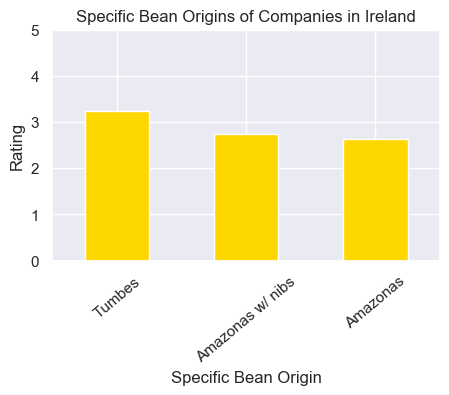

In [44]:
rating_mean = ireland.groupby(['Specific_Bean_Origin'])['Rating'].mean().sort_values(ascending=False)
mean_desc=rating_mean.sort_values(ascending=False)
top_10_comp=mean_desc[:11]
top_10_comp.head(11)
plt.figure(figsize=(5,3))
title="Specific Bean Origins of Companies in Ireland"
plt.title(title)
top_10_comp.plot.bar(color="gold")
plt.xticks(rotation=40)
plt.ylim(0,5)
plt.xlabel('Specific Bean Origin')
plt.ylabel('Rating')
plt.savefig(title)

### The One

In [45]:
best_choc = dataset[dataset.Rating > 4.0]
best_choc.head()

Company Specific_Bean_Origin  REF  Review_Date  Cocoa_Percentage  \
78  Amedei                Chuao  111         2007               0.7   
86  Amedei        Toscano Black   40         2006               0.7   

   Company_Location  Rating   Bean_Type Broad_Bean_Orgin Bean_Type_Cleaned  
78            Italy     5.0  Trinitario        Venezuela        TRINITARIO  
86            Italy     5.0       Blend                              BLEND

## Thanks for visiting!